<font size="6">Exploratory Data Analysis (EDA)</font>

<font size="5">Introduction</font>

Exploratory Data Analysis part of the project will be conducted in the notebook. Current dataset has missing values in 'BMI' column. Therefore the dataset will be cleaned and will be prepared for further analysis. 
After, the data will be visualized to understand the distributions of the observations and relationship between each other. 

<font size="5">Imports and load data </font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#opening the data
df=pd.read_csv('..\Capstone-2-Data-wranglling\healthcare-dataset-stroke-data.csv',index_col='id')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<font size="5">Cleaning</font>

Columns with numerical values are stored in numerical_col and columns with categorical values are stored in categorical_col.

In [6]:
df_num=df.dtypes!='object'
numerical_col=list(df_num[df_num].index)
df_cat=df.dtypes=='object'
categorical_col=list(df_cat[df_cat].index)
print('numerical columns: ',numerical_col)
print('categorical columns: ',categorical_col)

numerical columns:  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
categorical columns:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [7]:
df.describe(exclude = ['float', 'int64'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


The overall analysis of the categorical columns are shown above. It includes the number of unique values(category in this case), and which value appears most frequently the most in each column. 
Interesting fact can be obesrved in 'gender' columns since it has 3 unique values(usually male and female). It will be double checked later.

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Overall analysis of the numerical columns are shown above. It has minimum, maximum, mean, standard deviation and IQR of each columns. Since hypertension, and heart_disease columns answer the yes/no question, they could be considered categorical variable.

In [9]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


As it was mentioned above, there is an observation with 'gender' column labeled as 'Other' and there is only one observation with it so the observation was removed from the dataframe.

In [10]:
#removing the row with 'Other Gender'
df=df[df['gender']!='Other']
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


In [11]:
a=df['stroke'].value_counts(normalize=True)
percent_stroke=round(a,4)
percent_stroke*100

0    95.13
1     4.87
Name: stroke, dtype: float64

Overall proportion of the patients with stroke is calculated from the dataset. There are about 4.87 percent patients with stroke.

<font size="5">Data Visualization</font>

First overall distribution of age and bmi are visualized, however bmi columns still has missing values and value to impute with will be determined after it is analyzed.

(array([  8.,  92., 311., 463., 678., 822., 776., 619., 414., 266., 192.,
        117.,  48.,  38.,  19.,  24.,   8.,   5.,   3.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([10.3 , 13.21, 16.12, 19.03, 21.94, 24.85, 27.76, 30.67, 33.58,
        36.49, 39.4 , 42.31, 45.22, 48.13, 51.04, 53.95, 56.86, 59.77,
        62.68, 65.59, 68.5 , 71.41, 74.32, 77.23, 80.14, 83.05, 85.96,
        88.87, 91.78, 94.69, 97.6 ]),
 <BarContainer object of 30 artists>)

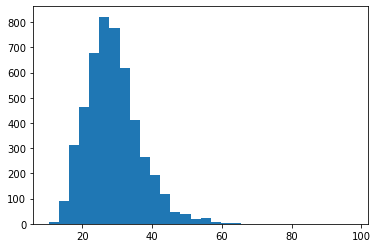

In [12]:
plt.hist(x='bmi',data=df,bins=30)

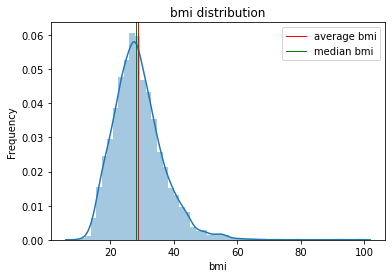

In [13]:
sns.distplot(df['bmi'])
plt.axvline(df['bmi'].mean(), color='red', linewidth=1,label=str('average bmi'))
plt.axvline(df['bmi'].median(), color='green', linewidth=1,label=str('median bmi'))
plt.title('bmi distribution')
plt.ylabel('Frequency')
plt.legend()

As the plot above shows using either median or mean of bmi can be used to replace the missing bmi values of the observations.

In [14]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [15]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

The missing values are replaced with mean values for bmi and there is 0 missing values now.

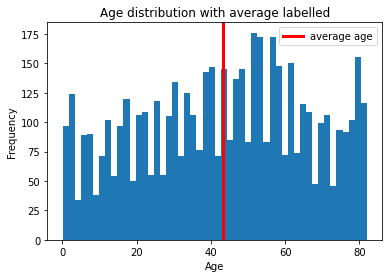

In [16]:
plt.hist(x='age',data=df,bins=50,histtype='bar')
plt.axvline(df['age'].mean(), color='red', linewidth=3,label=str('average age'))
plt.title('Age distribution with average labelled')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

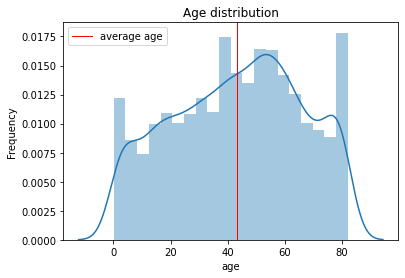

In [17]:
sns.distplot(df['age'])
plt.axvline(df['age'].mean(), color='red', linewidth=1,label=str('average age'))
plt.title('Age distribution')
plt.ylabel('Frequency')
plt.legend()

Overall shape of the age distribution is plotted with mean value drawn in the histogram. The mean age is approximately 43

Text(0.5, 1.0, 'Stroke vs No Stroke comparison')

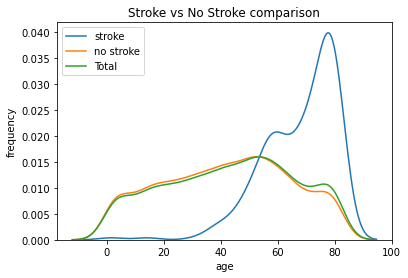

In [18]:
sns.kdeplot('age',data=df[df.stroke==1],label='stroke')
sns.kdeplot('age',data=df[df.stroke==0],label='no stroke')
sns.kdeplot('age',data=df,label='Total')
plt.ylabel('frequency')
plt.legend()
plt.title('Stroke vs No Stroke comparison')

There is a significant relationship between age groups and patients with stroke. The rate of stroke starts to increase from age of 40 and peaks at age of 80. The stroke occurence is below the no strok level until the age of aroun 50 and it flips after.

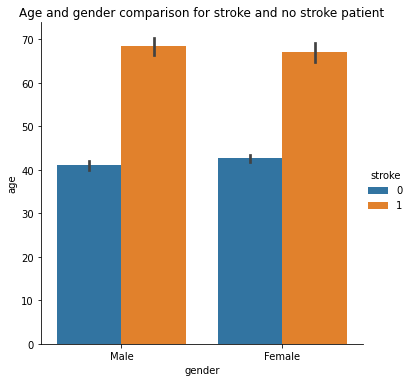

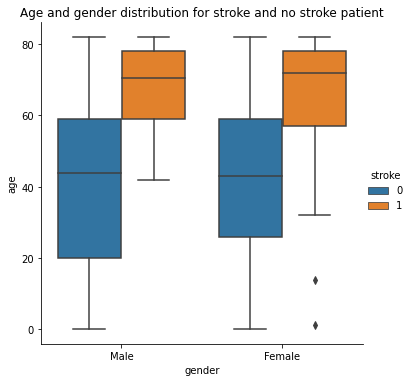

In [19]:
_=sns.catplot(x='gender',y='age',data=df,kind='bar',hue='stroke')
_=plt.title('Age and gender comparison for stroke and no stroke patient')
_=sns.catplot(x='gender',y='age',data=df,hue='stroke',kind='box')
_=plt.title('Age and gender distribution for stroke and no stroke patient')

The barplot and the boxplot above shows how stroke occurs differently in different gender groups. Both male and female have higher risk of stroke as they get older however, females tend to experience stroke from younger age groups(both outliers are from female).
They both clearly show that patients to are exposed to higher risk of stroke as they age.

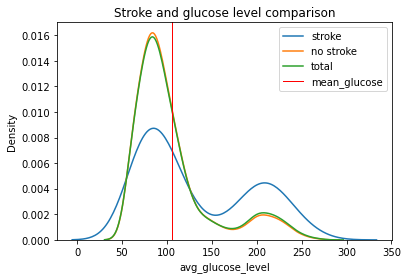

In [20]:
sns.kdeplot('avg_glucose_level',data=df[df.stroke==1],label='stroke')
sns.kdeplot('avg_glucose_level',data=df[df.stroke==0],label='no stroke')
sns.kdeplot('avg_glucose_level',data=df,label='total')
plt.axvline(df['avg_glucose_level'].mean(), color='red', linewidth=1,label='mean_glucose')
plt.title('Stroke and glucose level comparison')
plt.legend()

Text(0.5, 1.0, 'Stroke distribution by gender and glucose level ')

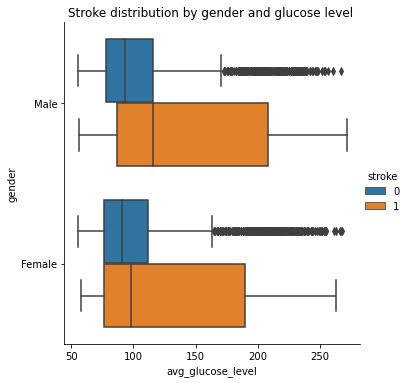

In [21]:
sns.catplot(x='avg_glucose_level',y='gender',data=df,hue='stroke',kind='box')
plt.title('Stroke distribution by gender and glucose level ')

The glucose level also shows a relationship with the risk of stroke. As the gluscose level increases the risk also increases for both male and female as shows above. 

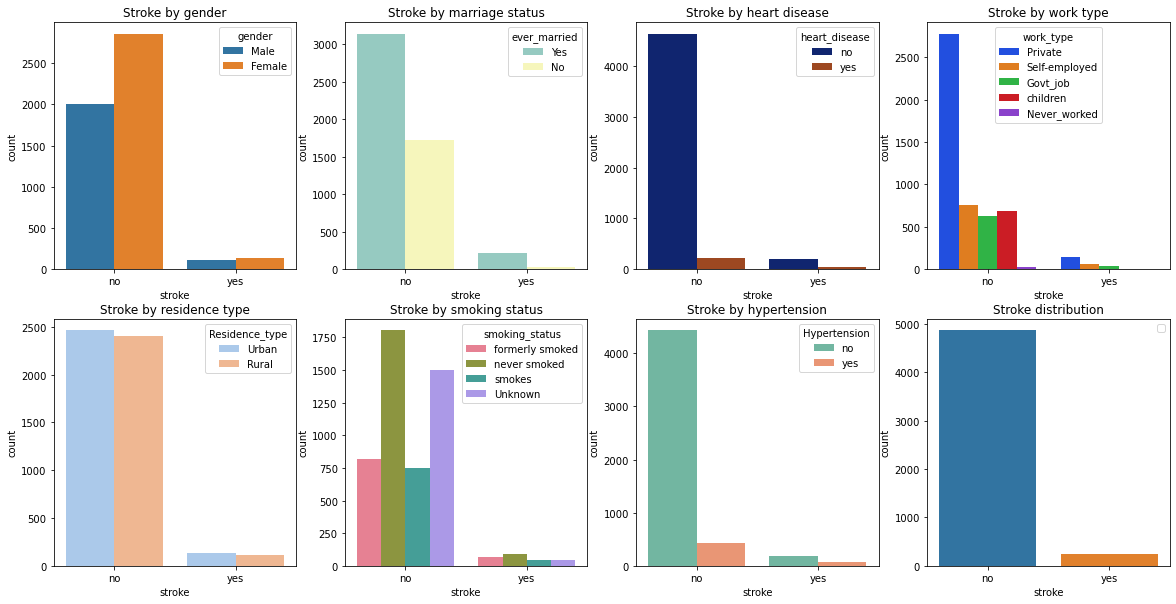

In [22]:
fig,ax=plt.subplots(2,4,figsize=(20,10))
_=sns.countplot(ax=ax[0,0],x='stroke',data=df,hue='gender')
_.set_xticklabels(['no','yes'])
_.set_title('Stroke by gender')
_=sns.countplot(ax=ax[0,1],x='stroke',data=df,hue='ever_married',palette='Set3')
_.set_xticklabels(['no','yes'])
_.set_title('Stroke by marriage status')
_=sns.countplot(ax=ax[0,2],x='stroke',data=df,hue='heart_disease',palette='dark')
_.legend(title='heart_disease',labels=['no','yes'])
_.set_xticklabels(['no','yes'])
_.set_title('Stroke by heart disease')
_=sns.countplot(ax=ax[0,3],x='stroke',data=df,hue='work_type',palette='bright')
_.set_xticklabels(['no','yes'])
_.set_title('Stroke by work type')
_=sns.countplot(ax=ax[1,0],x='stroke',data=df,hue='Residence_type',palette='pastel')
_.set_xticklabels(['no','yes'])
_.set_title('Stroke by residence type')
_=sns.countplot(ax=ax[1,1],x='stroke',data=df,hue='smoking_status',palette='husl')
_.set_xticklabels(['no','yes'])
_.set_title('Stroke by smoking status')
_=sns.countplot(ax=ax[1,2],x='stroke',data=df,hue='hypertension',palette='Set2')
_.set_xticklabels(['no','yes'])
_.set_title('Stroke by hypertension')
_.legend(title='Hypertension',labels=['no','yes'])
_=sns.countplot(ax=ax[1,3],x='stroke',data=df)
_.set_xticklabels(['no','yes'])
_.set_title('Stroke distribution')
plt.legend(labels='')

The proportion of each features are plotted and stroke proportion in each variables were compared to it. Some interesting factors include thereis clearly higher risk for people with hypertension, or heart disease. The marriage status also had impact to the risk since those who have ever been married had higher risk of stroke. Lastly, it seems people who does not work or work with children have lower risk of stroke. Other variables showed simillar proportion.

<font size="5">Correlation</font>

In [23]:
df_corr=df.corr()
df_corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.324211,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.158252,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.036879,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167033,0.131991
bmi,0.324211,0.158252,0.036879,0.167033,1.000000,0.036075
stroke,0.245239,0.127891,0.134905,0.131991,0.036075,1.000000


Text(0.5, 1.0, 'correlation between numerical columns')

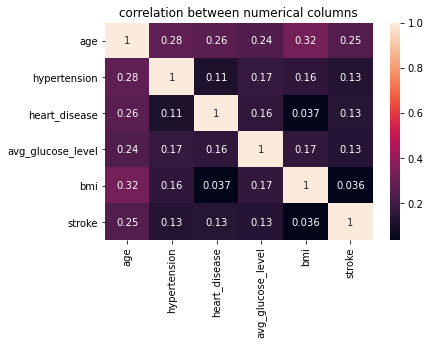

In [24]:
#plt.figure(figsize=(7,5))
sns.heatmap(df_corr,annot=True)
plt.title('correlation between numerical columns')

The correlation between each variables were calculated. As it shows the columns are weakly correlated except, age and bmi, age and hypertension, age and heartdisease.

Text(0.5, 1.0, 'bmi distribution by age and glucose level and stroke occurence')

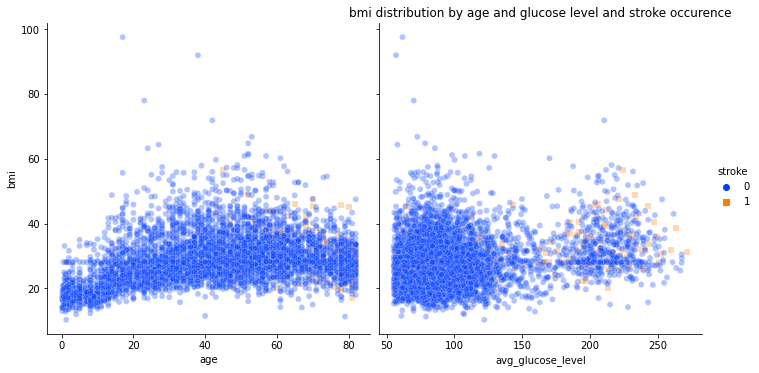

In [25]:
sns.pairplot(data=df,y_vars='bmi',x_vars=['age','avg_glucose_level'],hue='stroke',palette='bright',height=5,markers=['o','s'],plot_kws={'alpha':0.3})
plt.title('bmi distribution by age and glucose level and stroke occurence')

The bmi is not really correlated with average glucose level and has waeak correlation with age. Also as it shown above, increased bmi has no or slight impact to risk of stroke. Definitely, age and glucose level higher affects to the risk of stroke.

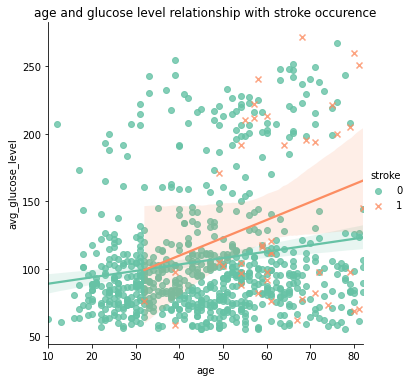

In [26]:
sns.lmplot(x='age',y='avg_glucose_level',data=df[df.smoking_status=='smokes'],hue='stroke',markers=['o','x'],palette='Set2',legend=True)
plt.title('age and glucose level relationship with stroke occurence')
plt.show()

As it shows, there is also a weak relationship between age and glucose level. Also the age and glucose level both has strong impacts to risk of stroke.

Text(0.5, 0.98, 'glucose level distribution by age and gender with stroke occurence')

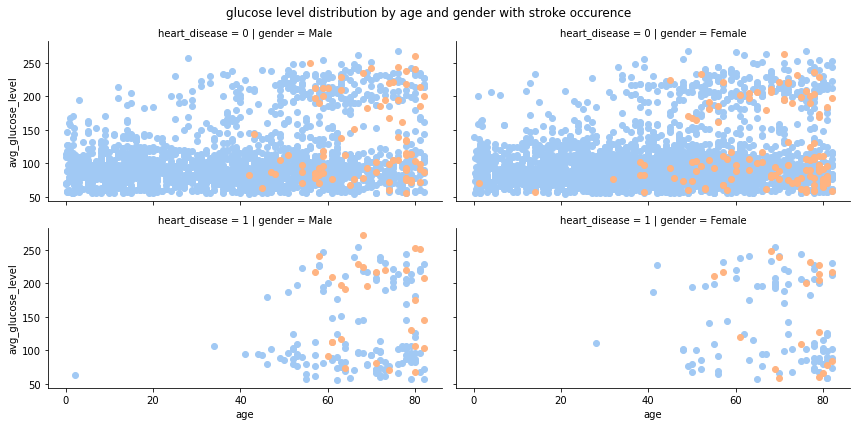

In [27]:
_=sns.FacetGrid(row='heart_disease',col='gender',hue='stroke',data=df,aspect=2,palette='pastel')
_.map(plt.scatter,'age','avg_glucose_level')
_.fig.subplots_adjust(top=0.9)
_.fig.suptitle('glucose level distribution by age and gender with stroke occurence')

In [28]:
heartprob=df[df.heart_disease==1]
heartprob[heartprob.stroke==1].shape,heartprob.shape
noheartprob=df[df.heart_disease!=1]
noheartprob[noheartprob.stroke==1].shape,noheartprob.shape

((202, 11), (4833, 11))

Approximately 17 percent of the patients with heart disease had stroke as well but only 4 percent of people without heart disease had stroke. It shows how heart disease incrases the risk of stroke. 

Text(0.5, 0.98, 'glucose level distribution by smoking status and heart disease with stroke occurence')

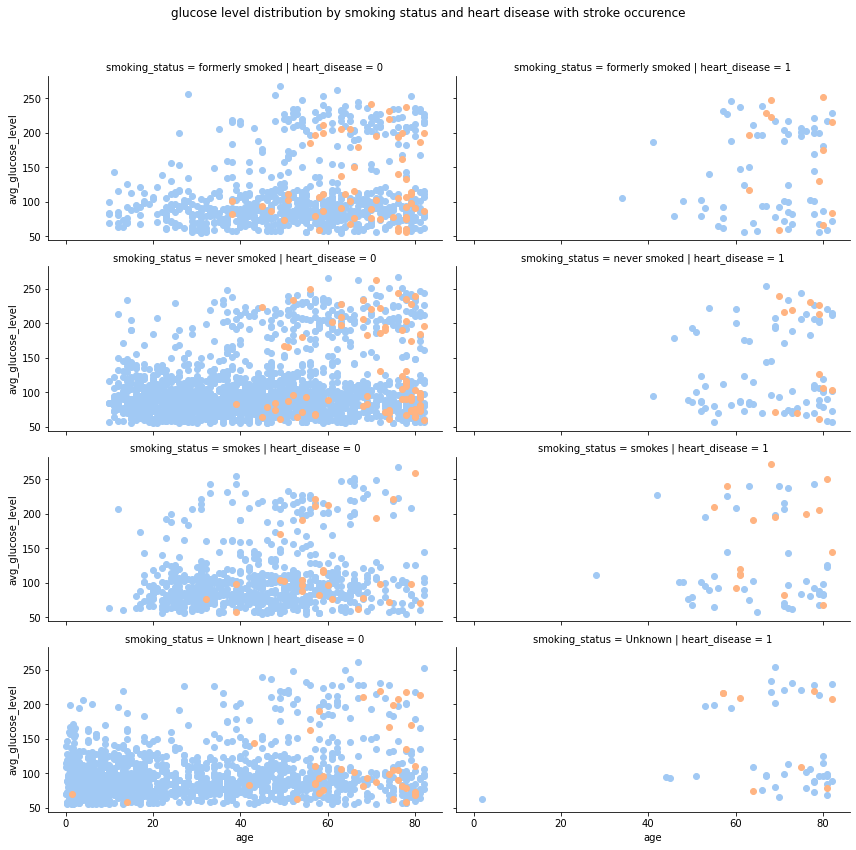

In [29]:
_=sns.FacetGrid(row='smoking_status',col='heart_disease',hue='stroke',data=df,aspect=2,palette='pastel')
_.map(plt.scatter,'age','avg_glucose_level')
_.fig.subplots_adjust(top=0.9)
_.fig.suptitle('glucose level distribution by smoking status and heart disease with stroke occurence')

Smoking status also had similar proportion of stroke compared to each cateogry of smoking status. However, there is a unknown cateogry in smoking status and it showed slightly higher proportion compared to the other categories.

<font size="6">Conclusion</font>

In conclusion, the data clenaning and preparation for analysis was conducted in the notebook. Some ovbservations with unknown variables were removed. The dataset was anaylzed visually by plotting different types of plots. The distribution of each columns were shown and how the stroke variable reacts to different values in different columns. The most variables those had impacts to risk of stroke was age, hypertension, heartdisease and glucose level. Also correlation between each variables are identified and mostly showed weak correlation. The most strong correlation that was observed was age and other columns and since it is true how people have higher health risk as they age therefore it was not a surprise.

In the next notebook, the data will be prepared before a machine learning model is developed to identify the risk of stroke in the early stage.The dataset still has categorical variables and numerical variables in the same dataframe. Also some of the categorical variables are labelled numerically therefore the dataset must be pre processed.